# Ling Thang
## Quiz2: Understand the model fitting

In [1]:
# Libraries needed for script
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


### New libraries explanation

#### 1. `sklearn LinearRegression`:
- `LinearRegression` class fits a linear model with input data and finds the line of best lien to minimize the differences between observed (Training) and predicted (Testing) lines
- `fit` method is used to fit the model to the input data
- `predict` method is used to predict the output values for the input data

#### 2. `PolynomialFeatures`:
- `PolynomialFeatures` class generates polynomial features from input data by raising features to a power 
- `fit_transform` method is used to fit the model to the input data and transform the input data into polynomial features
- `fit` method is used to fit the model to the input data
- `transform` method is used to transform the input data into polynomial features

#### 3. `mean_squared_error`:
- Alternative to Quiz2 Instructions `mean squared error loss = average ( sum (prediction - y)2 )`
- `mean_squared_error` function calculates the mean squared error between the observed and predicted output values
- 'measure of model fit quality'

#### 4. `train_test_split`:
- `train_test_split` function 
- `test_size` parameter is used to specify the size of the testing data
- `random_state` parameter is used to specify the random state for the split
- takes arguments and returns the split data


# Generate 500 random X values from -3 to 3.



In [2]:
m = 500
np.random.seed(seed=5)

X = 6 * np.random.random(m).reshape(-1, 1) - 3
y = 0.5 * X**5 -5*X**3- X**2 + 2 + 5*np.random.randn(m, 1)

### Using Random and Randn function to generate 500 random X values from -3 to 3.

* Random function is used to generate random numbers between 0 and 1.
* Randn function is used to generate random numbers from a normal distribution.


# 3 - Dataset 200 testing sample and 300 training sample

In [3]:
# Splite the data into training and testing data
# 200 sample for testing and 300 for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, train_size=300, random_state=21)
print("X Train -", X_train.size, "\nX Test -", X_test.size, "\nY Train -", y_train.size, "\nY Test -", y_test.size)


X Train - 300 
X Test - 200 
Y Train - 300 
Y Test - 200


# 4 - Linear Regression adn Polynomial Regression

In [4]:
train_loss = []
test_loss = []
degrees = list(range(2, 26))

- `train_loss` : mean squared error of the training data

- `test_loss` : mean squared error of the testing data

- `degree` : degree of the polynomial regression

# 5 - Calculate the loss using mean squared error 
    for all training and testing samples after the model is selected

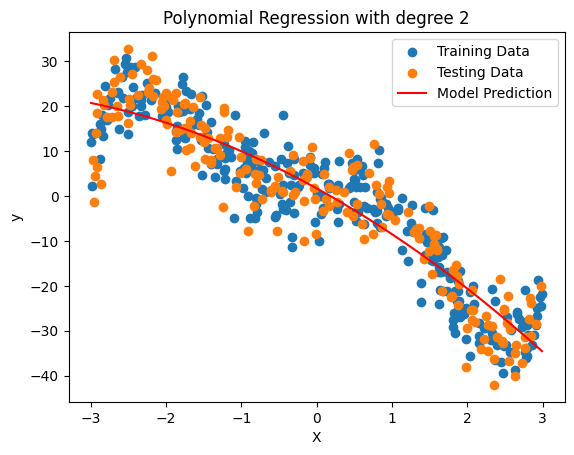

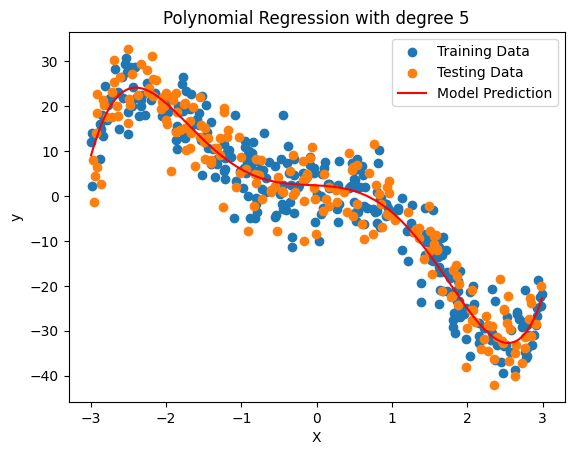

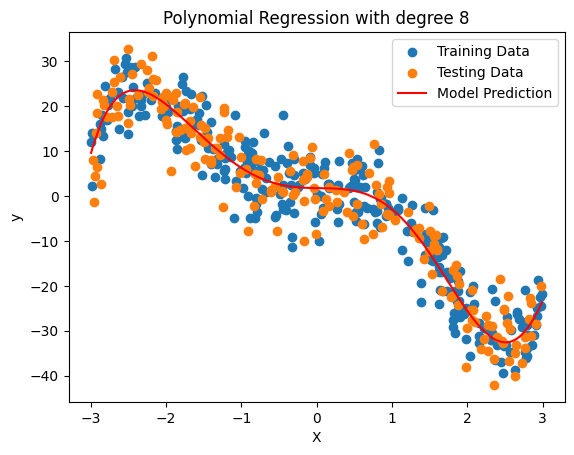

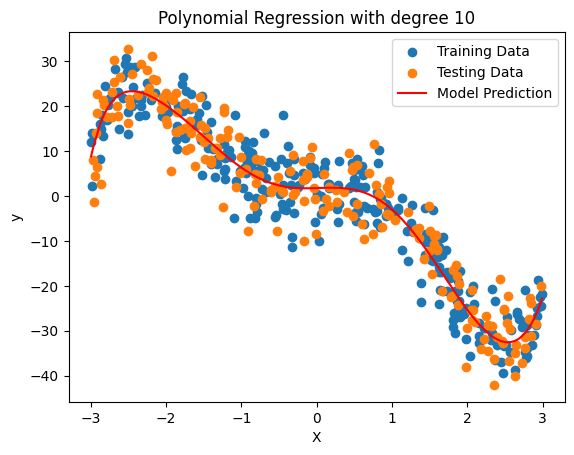

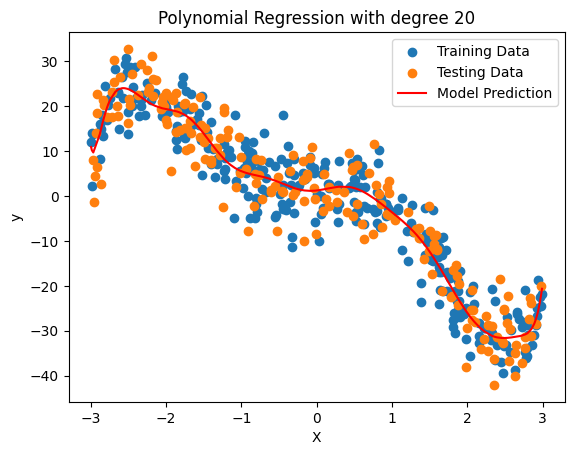

In [5]:
for degree in degrees:
    # Create a polynomial features object
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit the model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train_poly, y_train)

    # Make the predictions
    y_train_predict = lin_reg_model.predict(X_train_poly)
    y_test_predict = lin_reg_model.predict(X_test_poly)

    # Calculate the loss AKA the mean squared error
    train_loss.append(mean_squared_error(y_train, y_train_predict))
    test_loss.append(mean_squared_error(y_test, y_test_predict))
    
    if degree in [2, 5, 8, 10, 20]:
        plt.figure()
        plt.scatter(X_train, y_train, label='Training Data')
        plt.scatter(X_test, y_test, label='Testing Data')

        sorted_indices = np.argsort(X_train.flatten())
        plt.plot(X_train[sorted_indices], y_train_predict[sorted_indices], label='Model Prediction', color='r')
            
        plt.title(f'Polynomial Regression with degree {degree}')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend ()
        plt.show()

# 7 - Polt the figures show predictions using selected Degrees
    degree = 2, 5, 8, 10, 20

# 8 - Plot the figure tracking the chang of testing and training lossing 

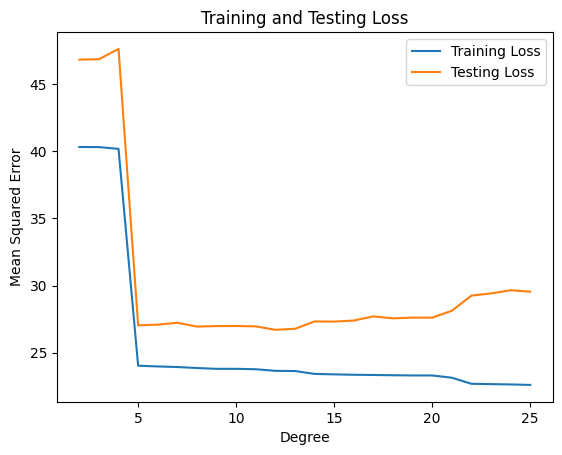

In [6]:
plt.figure()
plt.plot(degrees, train_loss, label='Training Loss')
plt.plot(degrees, test_loss, label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.legend()

In [7]:
# Find the index of the minimum testing loss
min_test_loss_index = np.argmin(test_loss)

# Get the degree(s) with the minimum testing loss
best_degrees = [degrees[i] for i in range(len(degrees)) if test_loss[i] == test_loss[min_test_loss_index]]

print(f"The degree(s) with the lowest testing loss is/are: {best_degrees}")


The degree(s) with the lowest testing loss is/are: [12]


# 9 - Conclusion
### Which degree numbers are the best for the model and why?

- Using the code segment below to calculate the best_degree we can see that the best degree for the model is 12. 
`[degrees[i] for i in range(len(degrees)) if test_loss[i] == test_loss[min_test_loss_index]]`

### Explanation:
- `degrees[i] for i in range(len(degrees))` : iterate through the degrees list
- `if test_loss[i] == test_loss[min_test_loss_index]` : if the test loss is equal to the minimum test loss
- `test_loss[min_test_loss_index]` : minimum test loss

- The best degree for the model is 12 because it has the lowest test loss.